In [1]:
!gpustat

blade                Fri Jul  2 09:15:36 2021  455.45.01
[0] RTX A6000        | 37'C,   0 % |     0 / 48685 MB |
[1] RTX A6000        | 35'C,   0 % |     0 / 48685 MB |
[2] RTX A6000        | 81'C,  96 % |  9692 / 48685 MB | seidj(9689M)
[3] RTX A6000        | 39'C,   0 % |     0 / 48685 MB |
[4] RTX A6000        | 38'C,   0 % |     0 / 48685 MB |
[5] RTX A6000        | 35'C,   0 % |     0 / 48685 MB |
[6] RTX A6000        | 25'C,   0 % | 44566 / 48685 MB | shyamss(44563M)
[7] RTX A6000        | 38'C,   2 % |     0 / 48685 MB |


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
!ls

1_small_depth_max_freq_2048.npy  small_depth_max_freq_1024.npy
1_small_depth_toy_loss_2048.npy  small_depth_test_l2_1024.pdf
2d_toy_plot.ipynb		 small_depth_toy_loss_1024.npy
init_lam.pdf			 small_depth_training_l2_1024.pdf
max_freq_1024.npy		 test_l2_1024.pdf
normal_init_depth.pdf		 toy_loss_1024.npy
scale_init_depth.pdf		 training_l2_1024.pdf


In [4]:
from jax import numpy as np
from matplotlib import pyplot as plt

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16,
                        'lines.linewidth': 2,
                        'axes.labelsize': 10,
                        'axes.titlesize': 16,
                        'xtick.labelsize': 10,
                        'ytick.labelsize': 10,
                        'legend.fontsize': 10,
                        'axes.linewidth': 2})

In [6]:
loss_stor = np.load('1_small_depth_toy_loss_2048.npy')
max_freqs = np.load('1_small_depth_max_freq_2048.npy')
max_freqs = max_freqs[:loss_stor.shape[0]]

In [7]:
loss_stor.shape

(12, 2, 2, 16, 4)

In [8]:
normal_loss = loss_stor[:,:,0,:,:]
scaled_loss = loss_stor[:,:,1,:,:]
normal_loss = normal_loss.reshape(normal_loss.shape[:2] + (-1,))
scaled_loss = scaled_loss.reshape(scaled_loss.shape[:2] + (-1,))

In [12]:
num_data = 2048

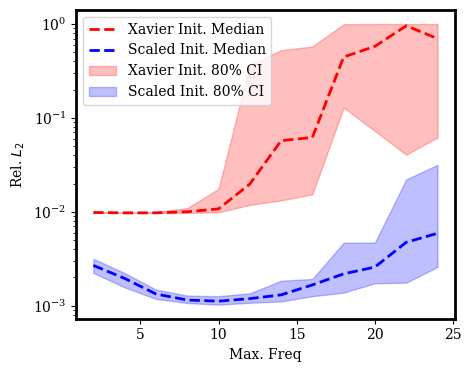

In [13]:
plt.figure(figsize = (5,4))
plt.plot(max_freqs / 2, np.median(normal_loss[:,0], axis = 1), color = 'r', linestyle = '--', label = 'Xavier Init. Median')
plt.plot(max_freqs / 2, np.median(scaled_loss[:,0], axis = 1), color = 'b', linestyle = '--', label = 'Scaled Init. Median')

plt.fill_between(max_freqs / 2, *np.quantile(normal_loss[:,0], np.array([0.1, 0.9]), 1), color = 'r', alpha = 0.25, label = 'Xavier Init. 80% CI')
plt.fill_between(max_freqs / 2, *np.quantile(scaled_loss[:,0], np.array([0.1, 0.9]), 1), color = 'b', alpha = 0.25, label = 'Scaled Init. 80% CI')
plt.yscale('log')
plt.legend()
plt.xlabel('Max. Freq')
plt.ylabel(r'Rel. $L_2$')
plt.tight_layout()
plt.savefig(f'1_small_depth_training_l2_{num_data}.pdf', dpi = 200)
plt.show()
plt.close()

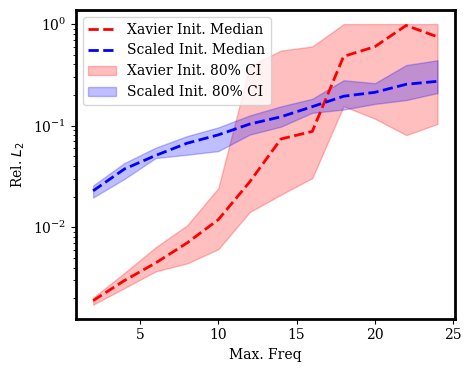

In [14]:
plt.figure(figsize = (5,4))
plt.plot(max_freqs / 2, np.median(normal_loss[:,1], axis = 1), color = 'r', linestyle = '--', label = 'Xavier Init. Median')
plt.plot(max_freqs / 2, np.median(scaled_loss[:,1], axis = 1), color = 'b', linestyle = '--', label = 'Scaled Init. Median')

plt.fill_between(max_freqs / 2, *np.quantile(normal_loss[:,1], np.array([0.1, 0.9]), 1), color = 'r', alpha = 0.25, label = 'Xavier Init. 80% CI')
plt.fill_between(max_freqs / 2, *np.quantile(scaled_loss[:,1], np.array([0.1, 0.9]), 1), color = 'b', alpha = 0.25, label = 'Scaled Init. 80% CI')
plt.yscale('log')
plt.legend()
plt.xlabel('Max. Freq')
plt.ylabel(r'Rel. $L_2$')
plt.tight_layout()
plt.savefig(f'1_small_depth_test_l2_{num_data}.pdf', dpi = 200)
plt.show()
plt.close()